In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pickle

In [15]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./trip_tag.csv')
df = df.drop('_id', axis=1)

In [3]:
df2 = df[['食物', '服務', '實惠', '氛圍']]

In [4]:
df2 = df2.replace('None', np.nan)
df2['食物'] = pd.to_numeric(df2['食物'])
df2['服務'] = pd.to_numeric(df2['服務'])
df2['實惠'] = pd.to_numeric(df2['實惠'])
df2['氛圍'] = pd.to_numeric(df2['氛圍'])
df2 = df2.fillna(1)
df2

,食物,服務,實惠,氛圍
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,4.5,4.5,4.0,4.5
3,4.5,4.5,4.0,4.0
4,4.5,4.5,3.5,4.5
...,...,...,...,...
9799,1.0,1.0,1.0,1.0
9800,1.0,1.0,1.0,1.0
9801,1.0,1.0,1.0,1.0
9802,1.0,1.0,1.0,1.0


In [5]:
df_list = df2.values.tolist()
df_list

[[1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [4.5, 4.5, 4.0, 4.5],
 [4.5, 4.5, 4.0, 4.0],
 [4.5, 4.5, 3.5, 4.5],
 [4.0, 4.0, 3.5, 4.0],
 [4.0, 4.5, 3.5, 4.0],
 [4.0, 4.0, 3.5, 4.5],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [5.0, 5.0, 4.5, 1.0],
 [4.5, 4.5, 3.5, 3.5],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [4.5, 4.5, 4.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [3.5, 3.5, 3.5, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [3.5, 4.0, 4.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [4.0, 4.0, 4.0, 4.0],
 [1.0, 1.0, 1.0, 1.0],
 [3.5, 3.0, 3.0, 3.0],
 [5.0, 4.5, 5.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [4.0, 4.0, 4.0, 1.0],
 [1.0, 1.0,

In [64]:
# 建 DBSCAN 模型
X = np.array(df_list)              
dbscan = DBSCAN(eps=0.5, min_samples=0).fit(X)
dbresult = dbscan.labels_.tolist()
print(dbresult)

[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 

In [65]:
# 建 K-means 模型
X = np.array(df_list)               
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmresult = kmeans.labels_.tolist()
print(kmresult)

[1, 1, 0, 0, 0, 4, 4, 4, 1, 1, 3, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 4, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 2, 1, 0, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 3, 4, 1, 1, 2, 1, 1, 1, 3, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 0, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 0, 2, 4, 1, 0, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 4, 3, 1, 

In [66]:
#標準化資料
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_list)

In [67]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

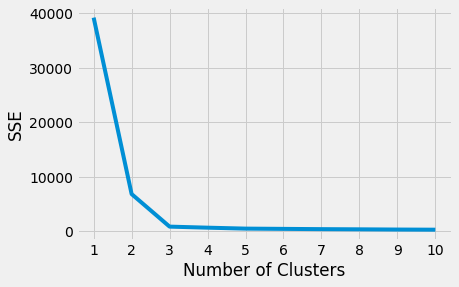

In [68]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [22]:
# Instantiate k-means and dbscan algorithms
# kmeans = KMeans(n_clusters=5)
# dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

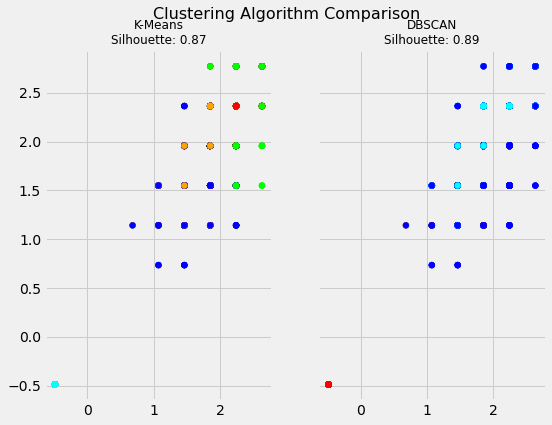

In [60]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison\n", fontsize=16)
fte_colors = {
    0: "#FF0000",
    1: "#00FFFF",
    2: "#0000FF",
    3: "#00FF00",
    4: "#FFA500",
    5: "#ffa500",
    6: "#800080",
#     7: "#add8e6",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"K-Means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [ ]:
model.cluster_centers_

In [ ]:
# 儲存 K-means 模型
with open("kmeansmodel.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
# 讀取 K-means 模型
with open("kmeansmodel.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
result = model.labels_.tolist()
print(result)

In [ ]:
df3 = pd.read_csv('./trip_tag_processed.csv')
df3 = df3.drop('Unnamed: 0', axis=1)

In [ ]:
df3['clustering'] = result
df3

In [ ]:
model.predict([[3, 3, 4, 2]])

In [ ]:
# 問卷答案輸入及分群預測
questionnaire = [int(input()), int(input()), int(input()), int(input())]
predicted_cluster = model.predict([questionnaire]).tolist()[0]
predicted_cluster

In [ ]:
df4 = df3[df3['clustering']==predicted_cluster]
df4

In [ ]:
df5 = pd.read_csv('./rest_sum_score.csv')
df5

In [ ]:
df6 = df3.set_index('餐廳名稱').join(df5.set_index('餐廳名稱'), how='left')
df6

In [ ]:
df6 = df6.fillna(0)
df6

In [ ]:
df6.to_csv('./kmeans_with_sum_socre.csv', encoding='utf-8_sig')

In [ ]:
df7 = pd.read_csv('./kmeans_with_sum_socre.csv')

In [ ]:
# 問卷答案輸入及分群預測
restType = "日式料理"
questionnaire = [int(input()), int(input()), int(input()), int(input())]
predicted_cluster = model.predict([questionnaire]).tolist()[0]
predicted_cluster

In [ ]:
df8 = df7[df7['clustering']==predicted_cluster]
df8 = df8[df8['餐廳類型'].str.contains(restType)]
df8 = df8.sort_values(by='評論分數', ascending=False)[:3]
top_three_recomm_id = df8['id'].to_list()
top_three_recomm_url = df8['餐廳網站'].to_list()
print(top_three_recomm_id[0])
print(top_three_recomm_id[1])
print(top_three_recomm_id[2])
print(top_three_recomm_url[0])
print(top_three_recomm_url[1])
print(top_three_recomm_url[2])